In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [13]:
iris = load_iris(as_frame=True)

In [14]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
target = pd.DataFrame(columns=['Type'])
target['Type'] = iris.target

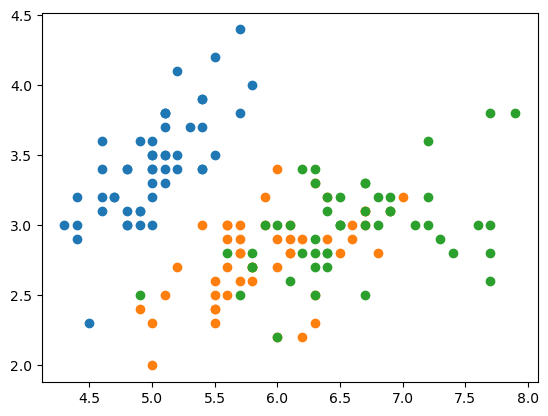

In [30]:
plt.scatter(iris.data['sepal length (cm)'].loc[target['Type']==0],iris.data['sepal width (cm)'].loc[target['Type']==0])
plt.scatter(iris.data['sepal length (cm)'].loc[target['Type']==1],iris.data['sepal width (cm)'].loc[target['Type']==1])
plt.scatter(iris.data['sepal length (cm)'].loc[target['Type']==2],iris.data['sepal width (cm)'].loc[target['Type']==2])

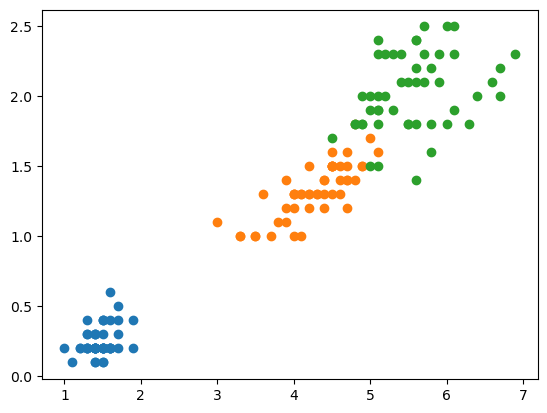

In [33]:
plt.scatter(iris.data['petal length (cm)'].loc[target['Type']==0],iris.data['petal width (cm)'].loc[target['Type']==0])
plt.scatter(iris.data['petal length (cm)'].loc[target['Type']==1],iris.data['petal width (cm)'].loc[target['Type']==1])
plt.scatter(iris.data['petal length (cm)'].loc[target['Type']==2],iris.data['petal width (cm)'].loc[target['Type']==2])

In [34]:
X = iris.data[['petal length (cm)','petal width (cm)']]

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,target,train_size=0.9,random_state= 42)

In [40]:
X_train

,petal length (cm),petal width (cm)
56,4.7,1.6
104,5.8,2.2
69,3.9,1.1
55,4.5,1.3
132,5.6,2.2
...,...,...
71,4.0,1.3
106,4.5,1.7
14,1.2,0.2
92,4.0,1.2


In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=42)
y_pred = kmeans.fit_predict(X_train)

In [41]:
X_train_duplicate = X_train.copy()

In [42]:
X_train_duplicate.reset_index(inplace=True)

In [44]:
X_train_duplicate.drop(['index'],inplace=True,axis=1)

In [45]:
X_train_duplicate

,petal length (cm),petal width (cm)
0,4.7,1.6
1,5.8,2.2
2,3.9,1.1
3,4.5,1.3
4,5.6,2.2
...,...,...
130,4.0,1.3
131,4.5,1.7
132,1.2,0.2
133,4.0,1.2


In [46]:
y_preds = pd.DataFrame()
y_preds['target'] = y_pred

In [50]:
y_preds

,target
0,0
1,2
2,0
3,0
4,2
...,...
130,0
131,0
132,1
133,0


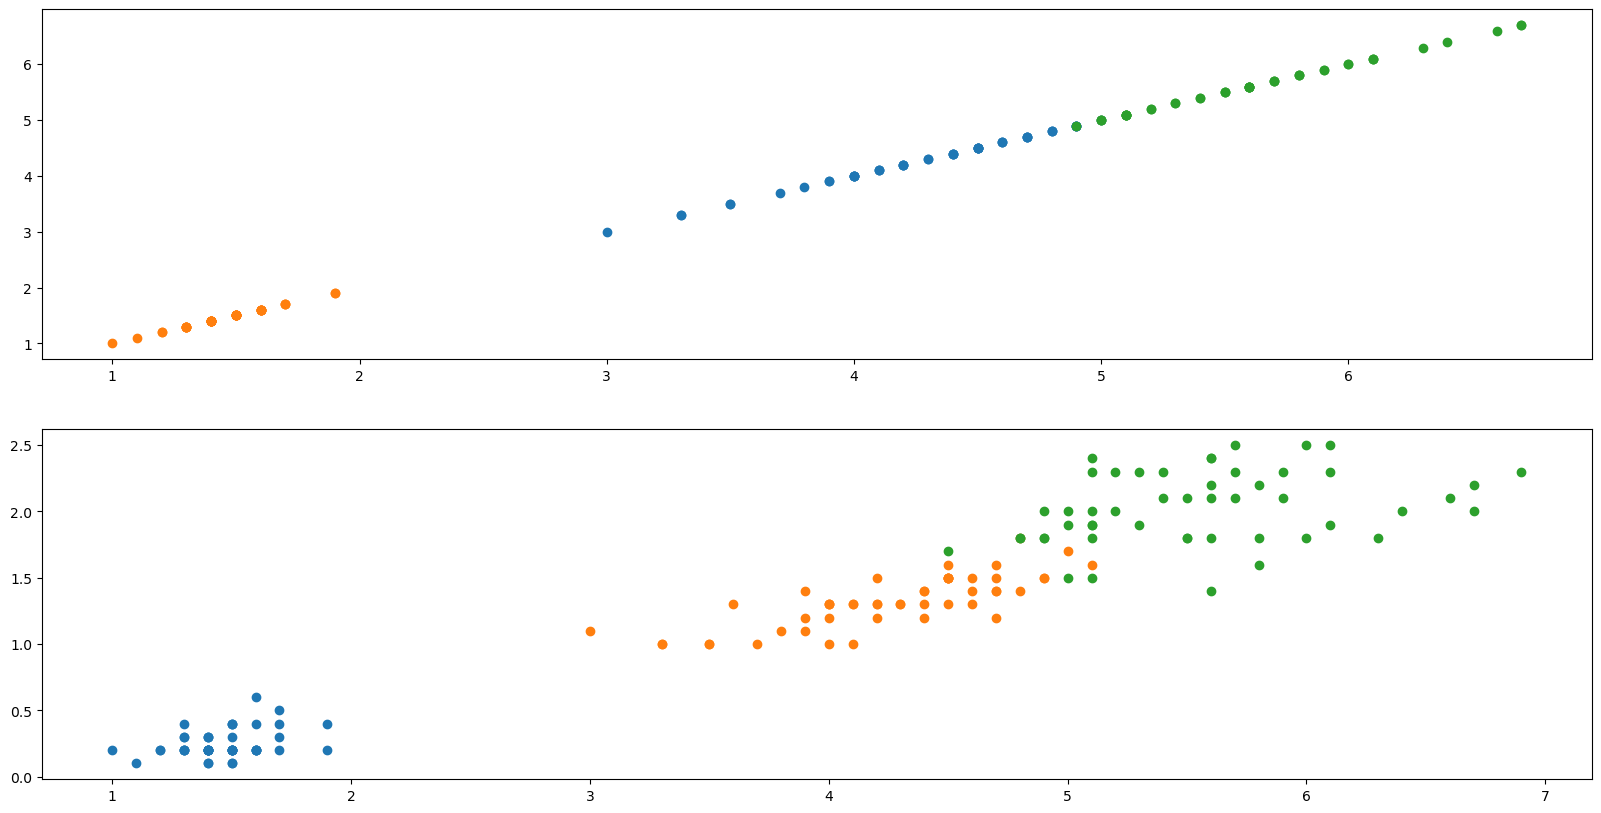

In [52]:
figure,axis = plt.subplots(2,1,figsize=(20,10))
axis[0].scatter(X_train_duplicate['petal length (cm)'].loc[y_preds['target']==0], X_train_duplicate['petal length (cm)'].loc[y_preds['target']==0])
axis[0].scatter(X_train_duplicate['petal length (cm)'].loc[y_preds['target']==1], X_train_duplicate['petal length (cm)'].loc[y_preds['target']==1])
axis[0].scatter(X_train_duplicate['petal length (cm)'].loc[y_preds['target']==2], X_train_duplicate['petal length (cm)'].loc[y_preds['target']==2])

axis[1].scatter(iris.data['petal length (cm)'].loc[target['Type']==0],iris.data['petal width (cm)'].loc[target['Type']==0])
axis[1].scatter(iris.data['petal length (cm)'].loc[target['Type']==1],iris.data['petal width (cm)'].loc[target['Type']==1])
axis[1].scatter(iris.data['petal length (cm)'].loc[target['Type']==2],iris.data['petal width (cm)'].loc[target['Type']==2])